In [1]:
import os
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
sc.settings.set_figure_params(dpi=100, frameon=False)
model = 'tranvae'

dir_path = os.path.expanduser(f'~/Documents/benchmarking_results/figure_1/{model}/ood_1/')
save_path = f'{dir_path}revision_class/'
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [3]:
ref = sc.read(f'{dir_path}reference_data.h5ad')
ref

AnnData object with n_obs × n_vars = 7584 × 10
    obs: 'celltype', 'batch', 'predictions', 'leiden'
    uns: 'leiden', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [4]:
f1 = sc.read(f'{dir_path}full_1_data.h5ad')
f1.obs.batch = f1.obs.batch.replace('Pancreas SS2', 'Pancreas SS2 (query 1)')
f1.obs.celltype = f1.obs.celltype.replace('Pancreas Alpha', 'Pancreas Alpha NEW')
f1

AnnData object with n_obs × n_vars = 10545 × 10
    obs: 'celltype', 'batch', 'predictions', 'leiden'
    uns: 'leiden', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
f2 = sc.read(f'{dir_path}full_2_data.h5ad')
f2.obs.batch = f2.obs.batch.replace('Pancreas SS2', 'Pancreas SS2 (query 1)')
f2.obs.batch = f2.obs.batch.replace('Pancreas CelSeq2', 'Pancreas CelSeq2 (query 2)')
f2.obs.celltype = f2.obs.celltype.replace('Pancreas Alpha', 'Pancreas Alpha NEW')
f2.obs.predictions = f2.obs.predictions.replace('Pancreas Alpha', 'Pancreas Alpha NEW')
f2

AnnData object with n_obs × n_vars = 12971 × 10
    obs: 'celltype', 'batch', 'predictions', 'leiden'
    uns: 'leiden', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [6]:
b_c = sc.pl.palettes.godsnot_102[10:15]
batch_color = [b_c[2], b_c[3], b_c[0],b_c[4], b_c[1]]
ct_c = sc.pl.palettes.godsnot_102
ct_color = [ct_c[0], ct_c[2],ct_c[3],ct_c[4],ct_c[5],ct_c[6],ct_c[7],ct_c[1]]

In [7]:
f2_b = [batch_color[0],batch_color[4],batch_color[1],batch_color[3],batch_color[2]]
f2_c = [ct_color[0],ct_color[7],ct_color[1],ct_color[2],ct_color[3],ct_color[4],ct_color[5],ct_color[6]]

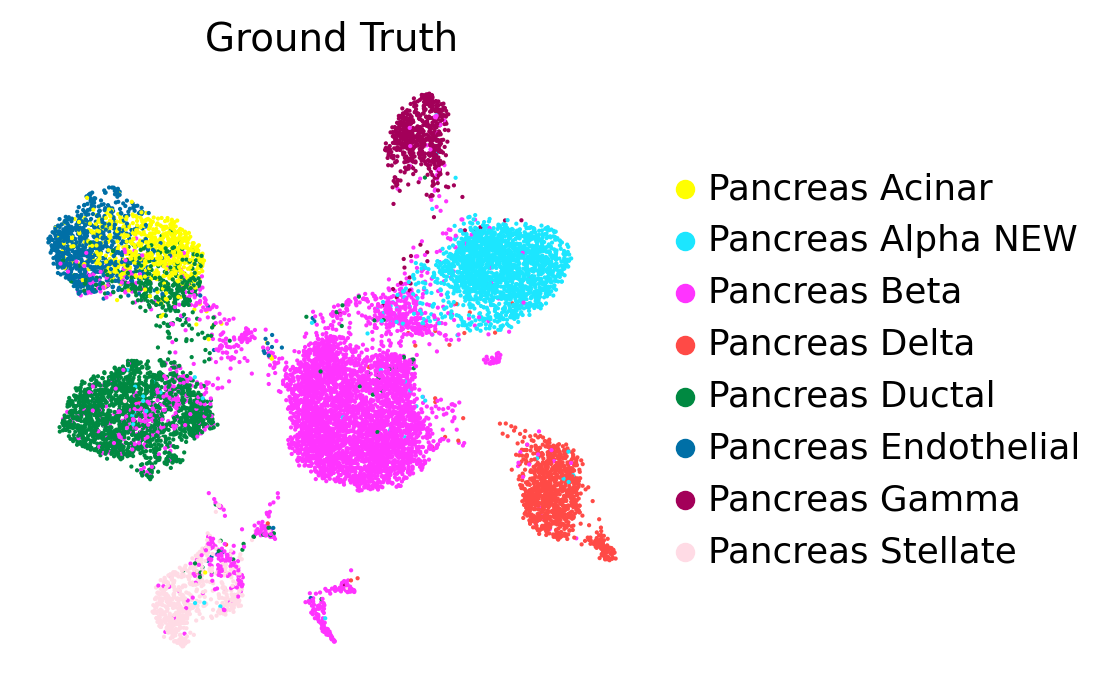

In [8]:
sc.pl.umap(
    f2,
    color="celltype",
    frameon=False,
    ncols=1,
    show=False,
    title='Ground Truth',
    palette=f2_c
)
plt.savefig(f"{save_path}truth.pdf", bbox_inches='tight')

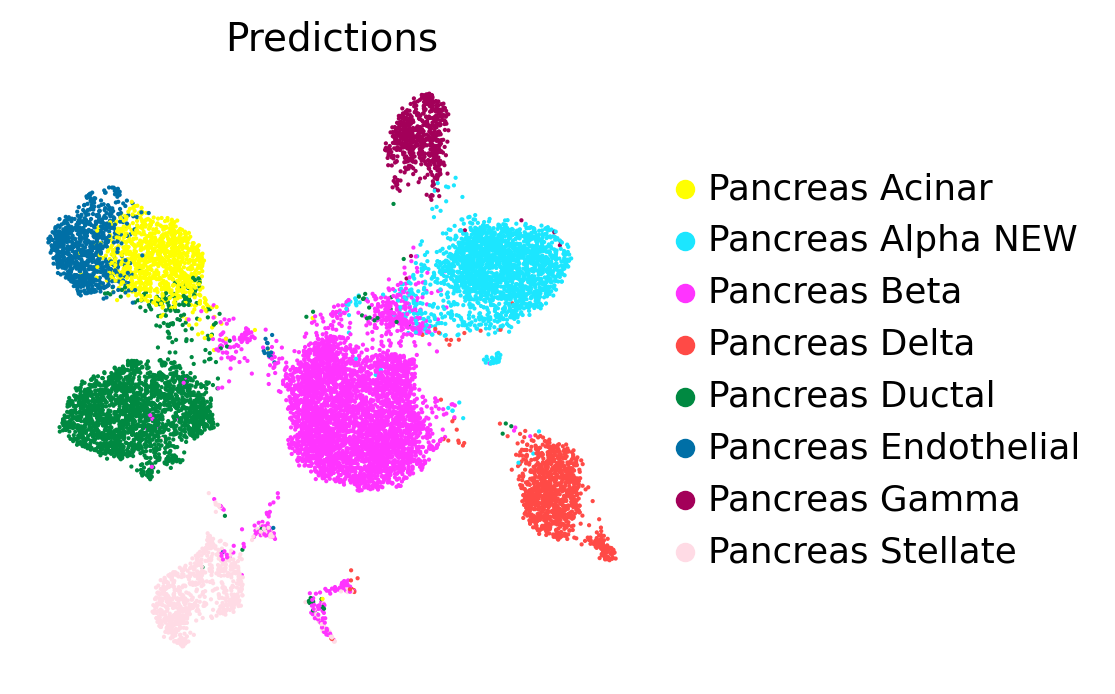

In [9]:
sc.pl.umap(
    f2,
    color="predictions",
    frameon=False,
    ncols=1,
    show=False,
    title='Predictions',
    palette=f2_c
)
plt.savefig(f"{save_path}pred.pdf", bbox_inches='tight')

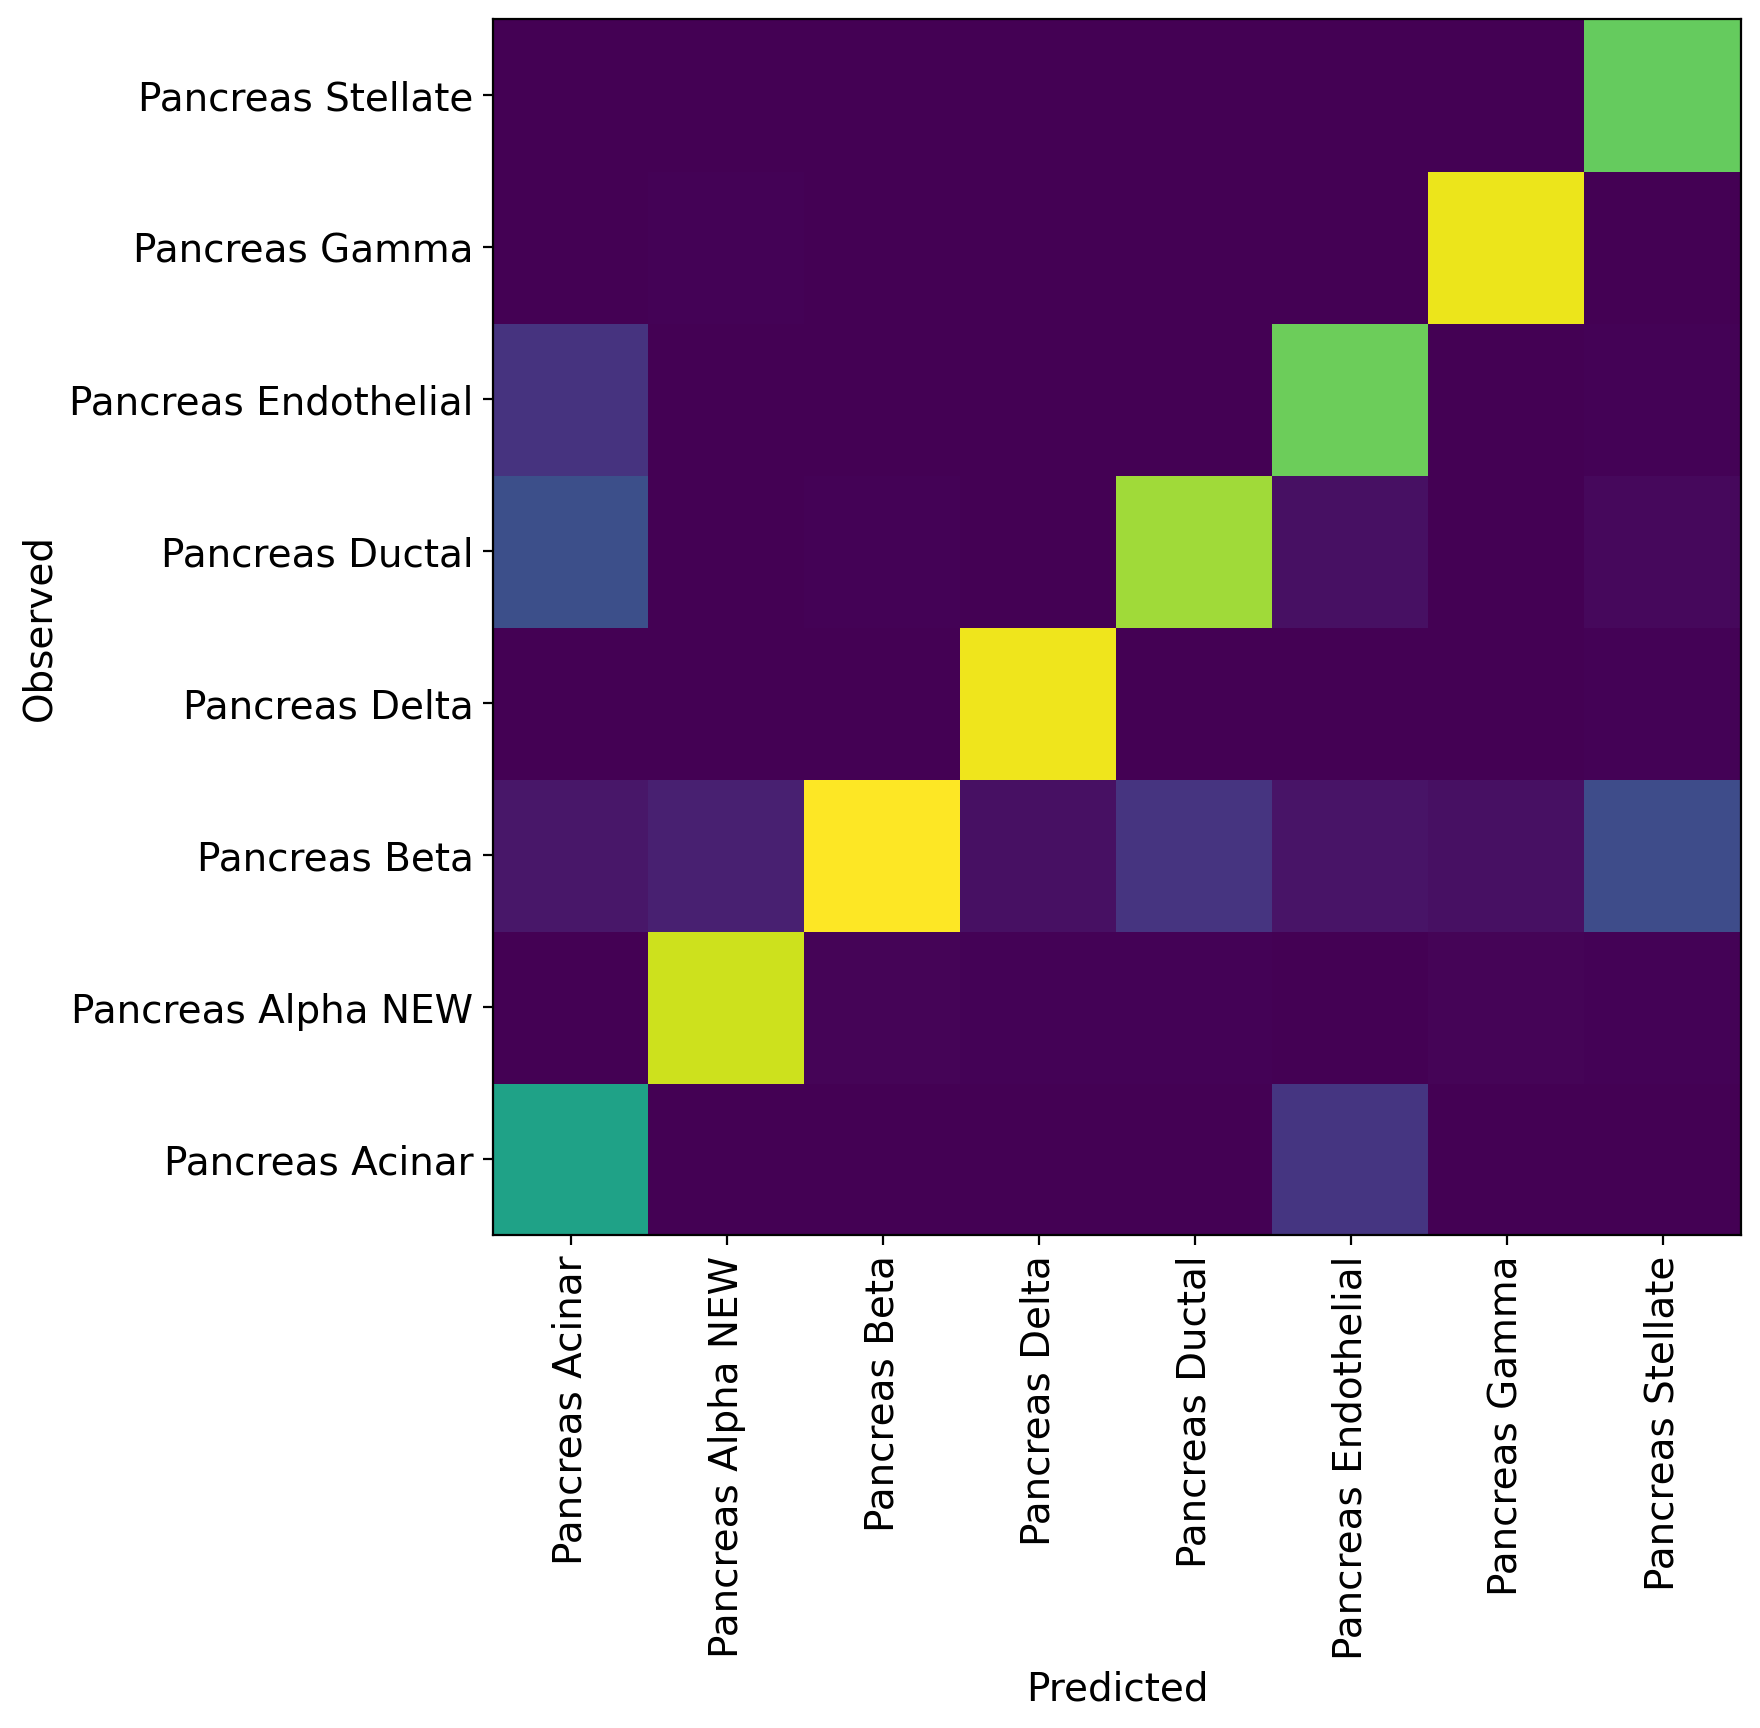

In [10]:
df = f2.obs.groupby(["celltype", "predictions"]).size().unstack(fill_value=0)
norm_df = df / df.sum(axis=0)

plt.figure(figsize=(8, 8))
_ = plt.pcolor(norm_df)
_ = plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.savefig(f"{save_path}table.pdf", bbox_inches='tight')